## Name :- Darpan Gaur
## Roll Number :- CO21BTECH11004

In [1]:
# library import
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

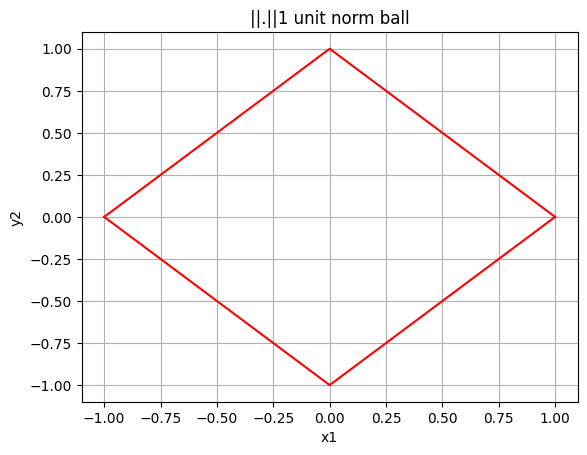

In [2]:
# Que 1 (a)
# Write a function that accepts p and plots the ||.||p unit norm ball. Test with integer p ≥ 1 as well as 0 < p < 1.

def get_norm_ball(p):
    if p == 0:
        print("give p > 0")
        return
    x = np.linspace(-1, 1, 1000)
    y1 = (1 - np.abs(x)**p)**(1/p)
    y2 = -y1
    return x, y1, y2

def plot_p_norm_ball(p, ax):
    x, y1, y2 = get_norm_ball(p)
    if (ax==None):
        ax = plt.gca()
    ax.plot(x, y1, 'r')
    ax.plot(x, y2, 'r')
    ax.set_title(f"||.||{p} unit norm ball")
    ax.set_xlabel("x1")
    ax.set_ylabel("y2")
    ax.grid()

plot_p_norm_ball(1, None)

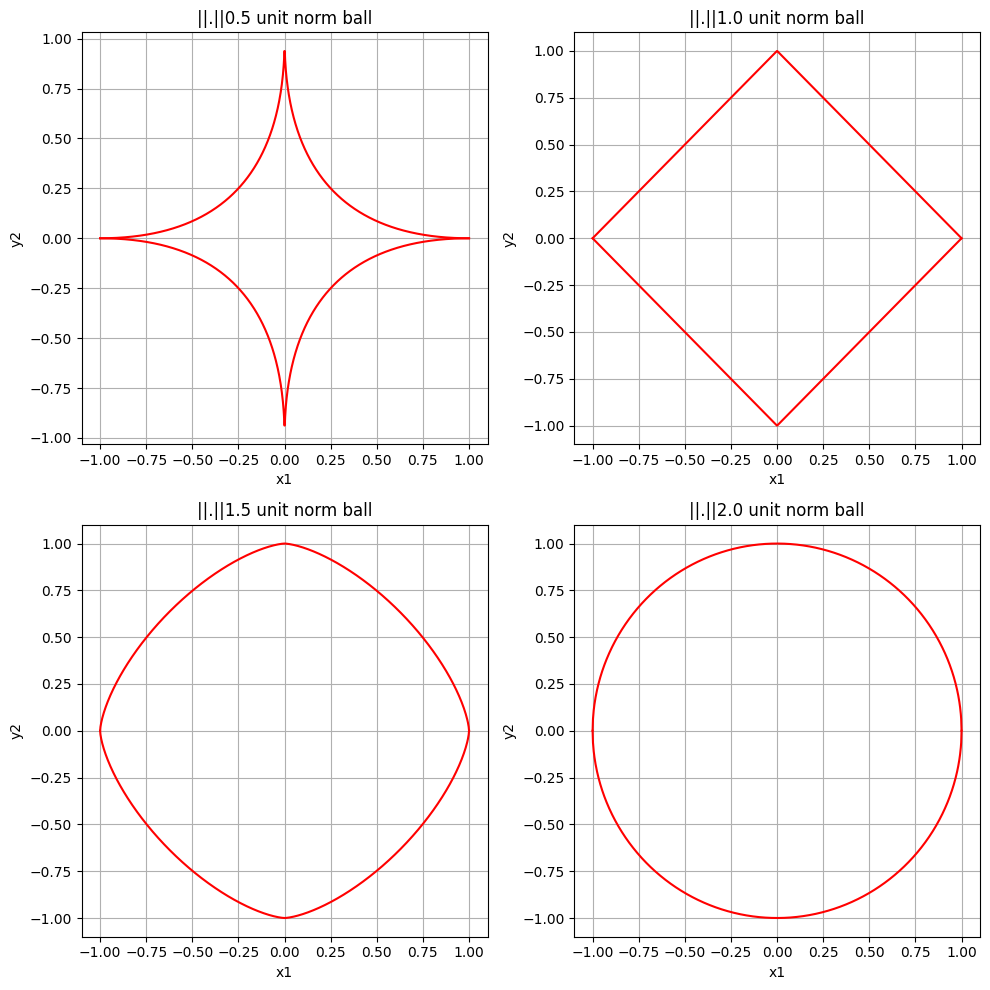

In [3]:
# Que 1 (b)
# plot 4 norm plots for p = 1, 2, 3, 4 in a 2x2 grid
plt.figure(figsize=(10, 10))
for i in range(1, 5):
    ax = plt.subplot(2, 2, i)
    plot_p_norm_ball(i/2, ax)
plt.tight_layout()
plt.show()


$
\text{Case 1: } p \geq 1 \\
\bullet \text{ For p=1, the unit norm ball is a diamond (or square rotated by 45 degrees).} \\
\bullet \text{ For p=2, the unit norm ball is a circle.} \\
\bullet \text{ For higher values of p, the unit ball becomes more like a square-like shape but still convex.} \\
$

$ 
\text{Case 2: } 0 < p < 1 \\
\bullet \text {The unit norm ball is not convex.} \\
\bullet \text {For p=0.5, the unit norm ball, is pointed at the corners, and points are closer to the center (here origin).} \\
$

$ \text{ \Large Que 2} $

$ \text{ Consider the function: } $

$$ f_n(x)=\begin{cases}
        0, &\text{if } 0 \le x \le \frac{1}{2}\\

        n(x-\frac{1}{2}), &\text{if }\frac12\le x\le \frac{1}{2}+\frac{1}{n}\\
        
        1, & \text{if } \frac{1}{2} + \frac{1}{n} \le x \le 1
\end{cases}
$$

$ \text{Show that } f_n \text{ is cauchy in } L^1[0,1]$ 

$$
\| f_n - f_m \|_p = \int^{1/2+1/n}_{1/2} |f_n(x)-f_m(x)| dx = \int^{1/2+1/n}_{1/2} |(n-m)(x-\frac{1}{2})| dx
$$

$$ 
\| f_n - f_m \| = \frac{n-m}{2n^2} \leq \frac{1}{2n} \to 0 
$$

$ \text{Hence, } f_n \text{ is cauchy in } L^1[0,1]$

$ \text{ Completeness: Let } f_n \text{ has a limit } f \text{ in } L^1[0,1]$

$ \implies \int^{1}_{0} |f(x)-f_n(x)| dx \to 0 \text{ as } n \to \infty$

$ \implies \int^{1/2}_{0} |f(x)-1| dx + \int^{1/2+1/n}_{1/2} |f(x)-n(x-1/2)| dx + \int^{1}_{1/2+1/n} |f(x) - 0| dx \to 0 \text{ as } n \to \infty$

$ \hspace{1cm} \text{for } \int^{1/2}_{0} |f(x)-1|dx \to 0 \text{ as } n \to \infty \implies f(x) = 1 \text{ for } x \in [0,1/2]$  

$ \hspace{1cm} \text{for } \int^{1}_{1/2+1/n} |f(x)|dx \to 0 \text{ as } n \to \infty \implies f(x) = 0 \text{ for } x \in [1/2,1]$

$ \hspace{1cm} \text{but a function cannot be both 0 and 1 at the same time. Hence, } C[0,1] \text{ is not complete with respect to } L^1[0,1]$


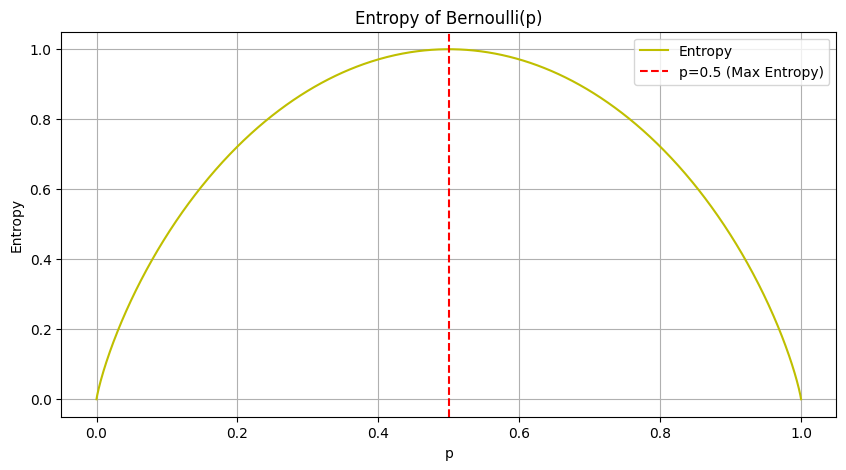

In [4]:
## Que 3 (a)

# function that takes pmf as input and returns entropy in bits
def entropy(pmf):
    # convert to numpy array and remove zeros
    pmf = np.array(pmf)
    # remove zeros and ones
    pmf = pmf[(pmf != 0) & (pmf != 1)]
    entropy = 0
    for p in pmf:
        entropy += -p * np.log2(p)
    return entropy


## Que 3 (b)
# plot pmf and entropy for a X ~ Bernoulli(p) as a function of p

p = np.linspace(0, 1, 1000)
# make pmf as n*2 array
pmf = np.vstack([p, 1-p]).T
# calculate entropy for each p
H = np.array([entropy(i) for i in pmf])

plt.figure(figsize=(10, 5))
plt.plot(p, H, color='y', label='Entropy')

# make a dotted x = 0.5 line
plt.axvline(x=0.5, linestyle='--', color='r', label='p=0.5 (Max Entropy)')

plt.xlabel("p")
plt.ylabel("Entropy")
plt.title("Entropy of Bernoulli(p)")
plt.legend()
plt.grid()
plt.show()


$ 
\text{For } X \backsim \text{ Bern(p) entropy given by } H(X) = -p \log(p) - (1-p) \log(1-p) \\\text{ attains maximum at } p = 0.5 \\
$

$ \text{ \Large Que 4} $

$ \hspace{1cm} H(X, Y) = -E_{(x, x)\sim p(x, y)}\log p(X, Y) $

$ \implies H(X, Y) = -\sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y) \log p(x, y)$ 

$ \hspace{1cm} p(x, y) = p(x)p(y|x) \hspace{4cm} [\text{conditional probability}]$

$ \implies H(X, Y) = -\sum\limits_{x \in X}\sum\limits_{y \in Y} p(x)p(y|x) \log p(x)p(y|x)$

$ \implies H(X, Y) = -\sum\limits_{x \in X}\sum\limits_{y \in Y} p(x)p(y|x) \log p(x) -\sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y)\log p(y|x)$

$ \implies H(X, Y) = -\sum\limits_{x \in X} p(x) \log p(x) - E_{(x, x)\sim p(x, y)}\log p(Y|X)$

$ \hspace{1cm} \boxed{H(X, Y) = H(X) + H(Y|X)} $

$ \text{ \Large Que 5} $

$ \hspace{1cm} I(X, Y) = E_{(x, y)\sim p(x, y)}\log \frac{p(X, Y)}{p(x)p(y)} $

$ \implies I(X, Y) = \sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y) \log \frac{p(x, y)}{p(x)p(y)} $

$ \hspace{1cm} p(x, y) = p(x)p(y|x) \hspace{4cm} [\text{conditional probability}]$

$ \implies I(X, Y) = \sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y)\log \frac{p(x)p(y|x)}{p(x)p(y)} $

$ \implies I(X, Y) = \sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y)\log p(y|x) - \sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y)\log p(y) $

$ \implies I(X, Y) = E_{(x, y)\sim p(x, y)}\log p(Y|X) - \sum\limits_{y \in Y} p(y)\log p(y) $

$ \hspace{1cm} \boxed{I(X, Y) = H(Y) - H(Y|X)} $

$ \hspace{1cm} p(x, y) = p(y)p(x|y) \hspace{4cm} [\text{conditional probability}]$

$ \implies I(X, Y) = \sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y)\log \frac{p(y)p(x|y)}{p(x)p(y)} $

$ \implies I(X, Y) = \sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y)\log p(x|y) - \sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y)\log p(x) $

$ \implies I(X, Y) = E_{(x, y)\sim p(x, y)}\log p(X|Y) - \sum\limits_{x \in X} p(x)\log p(x) $

$ \hspace{1cm} \boxed{I(X, Y) = H(X) - H(X|Y)} $

$ \text{ \Large Que 6 } $

$ \hspace{1cm} p(x=0) = \sum\limits_{k \in \set{0, 1}} p(x=0, y=k) $ 

$ \implies p(x=0) = p(x=0, y=0) + p(x=0, y=1) $

$ \implies p(x=0) = \frac{1}{3} + \frac{1}{3} = \frac{2}{3} $

$ \hspace{1cm} p(x=1) = \sum\limits_{k \in \set{0, 1}} p(x=1, y=k) $

$ \implies p(x=1) = p(x=1, y=0) + p(x=1, y=1) $

$ \implies p(x=1) = 0 + \frac{1}{3} = \frac{1}{3} $

$ \hspace{1cm} p(y=0) = \sum\limits_{k \in \set{0, 1}} p(x=k, y=0) $

$ \implies p(y=0) = p(x=0, y=0) + p(x=1, y=0) $

$ \implies p(y=0) = \frac{1}{3} + 0 = \frac{1}{3} $

$ \hspace{1cm} p(y=1) = \sum\limits_{k \in \set{0, 1}} p(x=k, y=1) $

$ \implies p(y=1) = p(x=0, y=1) + p(x=1, y=1) $

$ \implies p(y=1) = \frac{1}{3} + \frac{1}{3} = \frac{2}{3} $

$ \text{ \large (a) H(X), H(Y) } $

$ \hspace{1cm} H(X) = -\sum\limits_{x \in X} p(x) \log p(x) $

$ \implies H(X) = - p(x=0) \log p(x=0) - p(x=1) \log p(x=1) $

$ \implies H(X) = -\left(\frac{2}{3} \log \frac{2}{3} + \frac{1}{3} \log \frac{1}{3}\right) $

$ \hspace{1cm} \boxed{H(X) \approx 0.918} $

$ \hspace{1cm} H(Y) = -\sum\limits_{y \in Y} p(y) \log p(y) $

$ \implies H(Y) = - p(y=0) \log p(y=0) - p(y=1) \log p(y=1) $

$ \implies H(Y) = -\left(\frac{1}{3} \log \frac{1}{3} + \frac{2}{3} \log \frac{2}{3}\right) $

$ \hspace{1cm} \boxed{H(Y) \approx 0.918} $

$ \text{ \large (c) H(X, Y) } $

$ \hspace{1cm} H(X, Y) = -\sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y) \log p(x, y) $

$ \implies H(X, Y) = - p(x=0, y=0) \log p(x=0, y=0) - p(x=0, y=1) \log p(x=0, y=1) - p(x=1, y=0) \log p(x=1, y=0) - p(x=1, y=1) \log p(x=1, y=1) $

$ \implies H(X, Y) = -\left(\frac{1}{3} \log \frac{1}{3} + \frac{1}{3} \log \frac{1}{3} + 0 + \frac{1}{3} \log \frac{1}{3}\right) $

$ \hspace{1cm} \boxed{H(X, Y) \approx 1.585} $

$ \text{ \large (b) H(X|Y), H(Y|X) } $

$ \hspace{1cm} H(X|Y) = -\sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y) \log p(x|y) $

$ \implies H(X|Y) = - p(x=0, y=0) \log p(x=0|y=0) - p(x=1, y=0) \log p(x=1|y=0) - p(x=0, y=1) \log p(x=0|y=1) - p(x=1, y=1) \log p(x=1|y=1) $

$ \implies H(X|Y) = - p(x=0, y=0) \log \frac{p(x=0, y=0)}{p(y=0)} - p(x=1, y=0) \log \frac{p(x=1, y=0)}{p(y=0)} - p(x=0, y=1) \log \frac{p(x=0, y=1)}{p(y=1)} - p(x=1, y=1) \log \frac{p(x=1, y=1)}{p(y=1)} $

$ \implies H(X|Y) = -\left(\frac{1}{3} \log \frac{\frac{1}{3}}{\frac{1}{3}} + 0 \log \frac{0}{\frac{1}{3}} + \frac{1}{3} \log \frac{\frac{1}{3}}{\frac{2}{3}} + \frac{1}{3} \log \frac{\frac{1}{3}}{\frac{2}{3}}\right) $

$ \hspace{1cm} \boxed{H(X|Y) \approx 0.667} $

$ \hspace{1cm} H(Y|X) = -\sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y) \log p(y|x) $

$ \implies H(Y|X) = - p(x=0, y=0) \log p(y=0|x=0) - p(x=0, y=1) \log p(y=1|x=0) - p(x=1, y=0) \log p(y=0|x=1) - p(x=1, y=1) \log p(y=1|x=1) $

$ \implies H(Y|X) = - p(x=0, y=0) \log \frac{p(x=0, y=0)}{p(x=0)} - p(x=0, y=1) \log \frac{p(x=0, y=1)}{p(x=0)} - p(x=1, y=0) \log \frac{p(x=1, y=0)}{p(x=1)} - p(x=1, y=1) \log \frac{p(x=1, y=1)}{p(x=1)} $

$ \implies H(Y|X) = -\left(\frac{1}{3} \log \frac{\frac{1}{3}}{\frac{2}{3}} + \frac{1}{3} \log \frac{\frac{1}{3}}{\frac{2}{3}} + 0 \cdot \log \frac{0}{\frac{1}{3}} + \frac{1}{3} \log \frac{\frac{1}{3}}{\frac{1}{3}}\right) $

$ \hspace{1cm} \boxed{H(Y|X) \approx 0.585} $

$ \text{ \large (d) H(Y) - H(Y|X) } $

$ \hspace{1cm} H(Y) - H(Y|X) = -\sum\limits_{y \in Y} p(y) \log p(y) + \sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y) \log p(y|x) $

$ \implies H(Y) - H(Y|X) = - p(y=0) \log p(y=0) - p(y=1) \log p(y=1) + p(x=0, y=0) \log p(y=0|x=0) + p(x=0, y=1) \log p(y=1|x=0) + p(x=1, y=0) \log p(y=0|x=1) + p(x=1, y=1) \log p(y=1|x=1) $

$ \implies H(Y) - H(Y|X) = -\left(\frac{1}{3} \log \frac{1}{3} + \frac{2}{3} \log \frac{2}{3}\right) + \left(\frac{1}{3} \log \frac{\frac{1}{3}}{\frac{2}{3}} + \frac{1}{3} \log \frac{\frac{1}{3}}{\frac{2}{3}}\right) $

$ \hspace{1cm} \boxed{H(Y) - H(Y|X) \approx 0.251} $'

$ \text{ \large (e) I(X, Y) } $

$ \hspace{1cm} I(X, Y) = E_{(x, y)\sim p(x, y)}\log \frac{p(X, Y)}{p(x)p(y)} $

$ \implies I(X, Y) = \sum\limits_{x \in X}\sum\limits_{y \in Y} p(x, y) \log \frac{p(x, y)}{p(x)p(y)} $

$ \implies I(X, Y) = p(x=0, y=0) \log \frac{p(x=0, y=0)}{p(x=0)p(y=0)} + p(x=0, y=1) \log \frac{p(x=0, y=1)}{p(x=0)p(y=1)} + p(x=1, y=0) \log \frac{p(x=1, y=0)}{p(x=1)p(y=0)} + p(x=1, y=1) \log \frac{p(x=1, y=1)}{p(x=1)p(y=1)} $

$ \implies I(X, Y) = \frac{1}{3} \log \frac{\frac{1}{3}}{\frac{2}{3} \cdot \frac{1}{3}} +  \frac{1}{3} \log \frac{\frac{1}{3}}{\frac{2}{3} \cdot \frac{2}{3}} + 0 \cdot \log \frac{\frac{1}{3}}{\frac{1}{3} \cdot \frac{1}{3}} + \frac{1}{3} \log \frac{\frac{1}{3}}{\frac{1}{3} \cdot \frac{2}{3}} $ 

$ \hspace{1cm} \boxed{I(X, Y) \approx 0.251} $

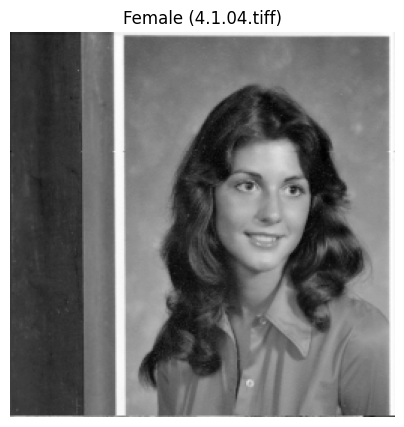

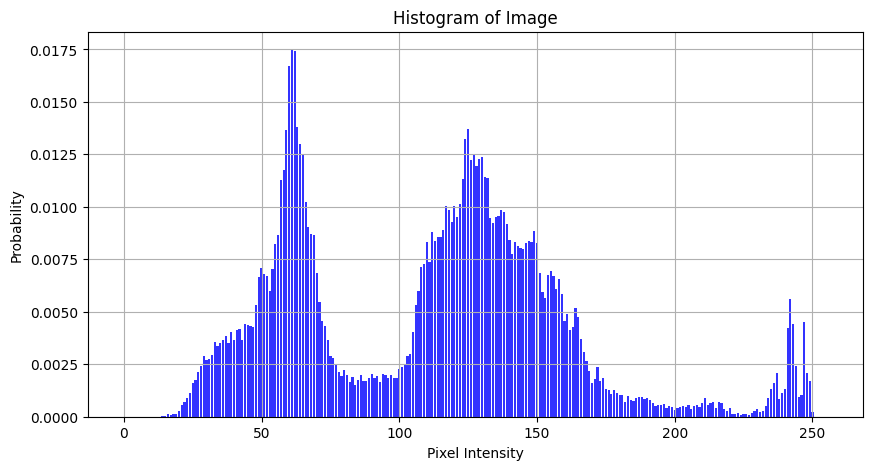

Entropy of the image is 7.25745968828594 bits


In [5]:
## Que 7 (a)
# load 4.1.04.tiff image in grayscale and plot it
img = Image.open("4.1.04.tiff").convert('L')
img = np.array(img)

# plot image
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Female (4.1.04.tiff)")
plt.show()

def get_normalized_histogram(img):
    # custum histogram function
    hist = np.zeros(256)
    for i in img.flatten():
        hist[i] += 1
    hist = hist / np.sum(hist)
    return hist

hist = get_normalized_histogram(img)

plt.figure(figsize=(10, 5))

# plot histogram bar
plt.bar(range(256), hist, color='b', alpha=0.8)

plt.xlabel("Pixel Intensity")
plt.ylabel("Probability")
plt.title("Histogram of Image")
plt.grid()
plt.show()

# Que 7 (b)
# calculate entropy of the image
H = entropy(hist)
print(f"Entropy of the image is {H} bits")

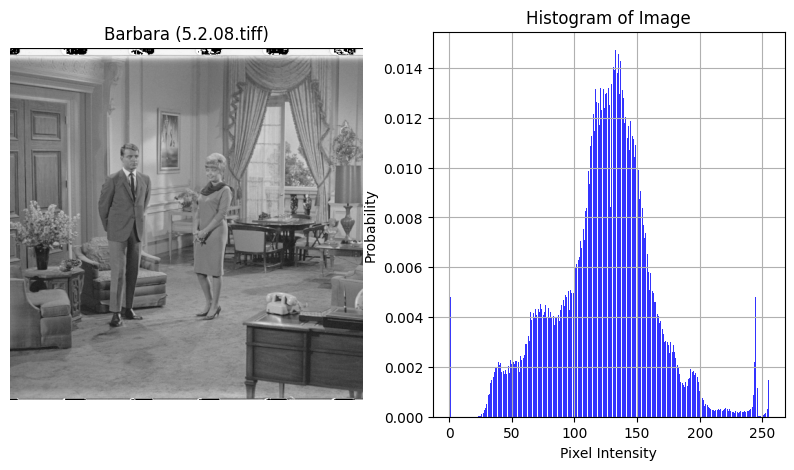

Entropy of the image 5.2.08.tiff is 7.201007959852423 bits


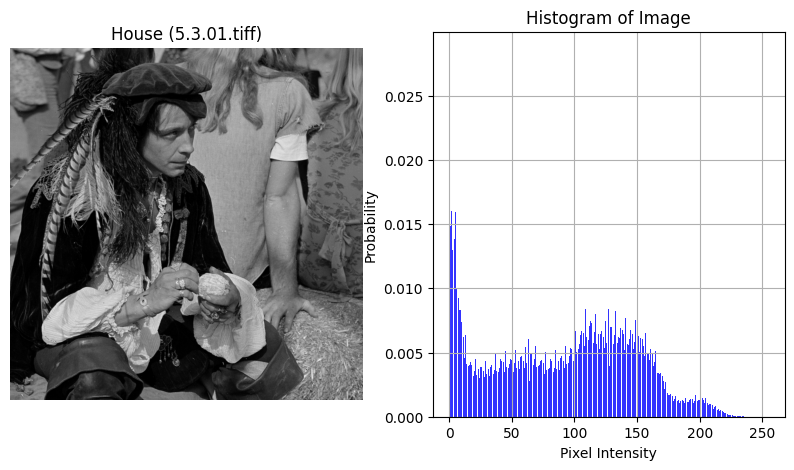

Entropy of the image 5.3.01.tiff is 7.523736852074143 bits


In [6]:
# Que 7 (b) continued
img = Image.open("5.2.08.tiff").convert('L')
img = np.array(img)

# plot image and hostogram side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Barbara (5.2.08.tiff)")

hist = get_normalized_histogram(img)

plt.subplot(1, 2, 2)
plt.bar(range(256), hist, color='b', alpha=0.8)
plt.xlabel("Pixel Intensity")
plt.ylabel("Probability")
plt.title("Histogram of Image")
plt.grid()
plt.show()

# calculate entropy of the image
H = entropy(hist)
print(f"Entropy of the image 5.2.08.tiff is {H} bits")

img = Image.open("5.3.01.tiff").convert('L')
img = np.array(img)

# plot image and hostogram side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("House (5.3.01.tiff)")

hist = get_normalized_histogram(img)

plt.subplot(1, 2, 2)
plt.bar(range(256), hist, color='b', alpha=0.8)
plt.xlabel("Pixel Intensity")
plt.ylabel("Probability")
plt.title("Histogram of Image")
plt.grid()
plt.show()

# calculate entropy of the image
H = entropy(hist)
print(f"Entropy of the image 5.3.01.tiff is {H} bits")


$
\text{ Entropy for image 4.1.04 is 7.25 bits, for image 5.2.08 is 7.20 bits and entorpy for image 5.3.01 is 7.52 bits.} \\
\text{ Histogram for image 4.1.04 can be considered as normal with two peaks, for image 5.2.08 as normal with one peak, so les entropy for 5.2.08.} \\
\text{ Histogram for image 5.3.01 is kind of oscillating around 0.005 with small window can be considered as constant, with high peaks in start and low in end, so high entropy.} \\
$

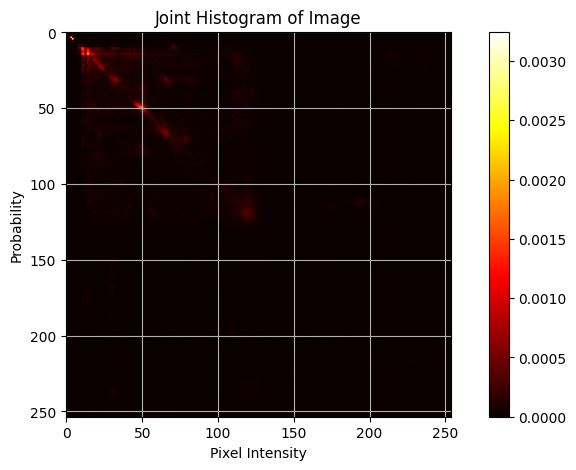

In [7]:
# Que 8 (a)
# load png images
img1 = cv2.imread("left.png", -1)
img2 = cv2.imread("right.png", -1)

def get_joint_normalized_histogram(img1, img2):
    # custum histogram function
    hist = np.zeros((img1.max()+1, img2.max()+1))
    for i, j in zip(img1.flatten(), img2.flatten()):
        hist[i, j] += 1
    hist = hist / np.sum(hist)
    return hist

hist = get_joint_normalized_histogram(img1, img2)

plt.figure(figsize=(10, 5))
plt.imshow(hist, cmap='hot')
plt.xlabel("Pixel Intensity")
plt.ylabel("Probability")
plt.title("Joint Histogram of Image")
plt.colorbar()
plt.grid()
plt.show()


In [8]:
# Que 8 (b)

# given joint pmf, calculate entropy
def joint_entropy(pmf):
    # convert to numpy array and remove zeros
    pmf = np.array(pmf)
    # remove zeros and ones
    pmf = pmf[(pmf != 0) & (pmf != 1)]
    entropy = 0
    for p in pmf:
        entropy += -p * np.log2(p)
    return entropy

H = joint_entropy(hist)
print(f"Joint Entropy of the images is {H} bits")


Joint Entropy of the images is 13.675203263376206 bits


In [9]:
# Que 9 (a)
# Write a function that accepts as input the joint PMF of a pair of random variables, the index of the 
# conditioning random variable, and the value of the conditioning random variable. The function
# must output the appropriate conditional PMF.

def conditional_pmf(pmf, index, value):
    # get the required conditional pmf
    pmf = np.array(pmf)
    if index == 0:
        return pmf[value, :] / np.sum(pmf[value, :])
    elif index == 1:
        return pmf[:, value] / np.sum(pmf[:, value])

pmf = [[0.125, 0.0625, 0.03125, 0.03125], [0.0625, 0.125, 0.03125, 0.03125], [0.0625, 0.0625, 0.0625, 0.0625], [0.25, 0.0, 0.0, 0.0]]
# print pmf , secifying x and y
print("PMF")
print("    Y=0  Y=1  Y=2  Y=3")
for i in range(len(pmf)):
    print(f"X={i} {pmf[i]}")


pmf = np.array(pmf)
print(f"Conditional PMF for Y=1 is {conditional_pmf(pmf, 1, 1)}")
print()

# Que 9 (b)
# Write a function that accepts as input the joint PMF and the index of the conditioning RV, and
# outputs the conditional entropy.

def conditional_entropy(pmf, index):
    # get the required conditional entropy
    pmf = np.array(pmf)
    # caluslte H(X|Y) = H(X, Y) - H(Y)
    H = entropy(pmf)
    H_var = entropy(pmf.sum(axis=index))
    return H - H_var

print(f"Conditional Entropy for X given Y is {conditional_entropy(pmf, 1)} bits")
print(f"Conditional Entropy for Y given X is {conditional_entropy(pmf, 0)} bits")
print()

# Que 9 (c)
print("Conditional Entopy for left and right images")
H = conditional_entropy(hist, 0)
print(f"Conditional Entropy for left given right is {H} bits")
H = conditional_entropy(hist, 1)
print(f"Conditional Entropy for right given left is {H} bits")

PMF
    Y=0  Y=1  Y=2  Y=3
X=0 [0.125, 0.0625, 0.03125, 0.03125]
X=1 [0.0625, 0.125, 0.03125, 0.03125]
X=2 [0.0625, 0.0625, 0.0625, 0.0625]
X=3 [0.25, 0.0, 0.0, 0.0]
Conditional PMF for Y=1 is [0.25 0.5  0.25 0.  ]

Conditional Entropy for X given Y is 1.375 bits
Conditional Entropy for Y given X is 1.625 bits

Conditional Entopy for left and right images
Conditional Entropy for left given right is 6.396577731680079 bits
Conditional Entropy for right given left is 6.416909158626265 bits


In [10]:
## Que 10 (a)
# Write a function that accepts as input two PMFs p and q as input, and outputs D(p||q).

def KL_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    # remove zeros
    p1 = p[(p != 0) | (q != 0)]
    q1 = q[(p != 0) | (q != 0)]
    return np.sum(p1 * np.log2(p1/q1))

p = [0.1, 0.2, 0.3, 0.4]
q = [0.2, 0.3, 0.4, 0.1]

print(f"KL Divergence of p and q is {KL_divergence(p, q)} bits")

KL Divergence of p and q is 0.45849625007211564 bits


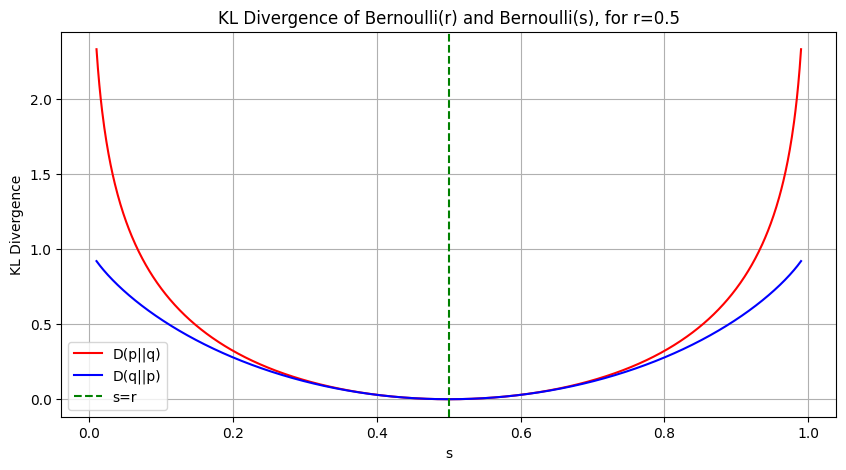

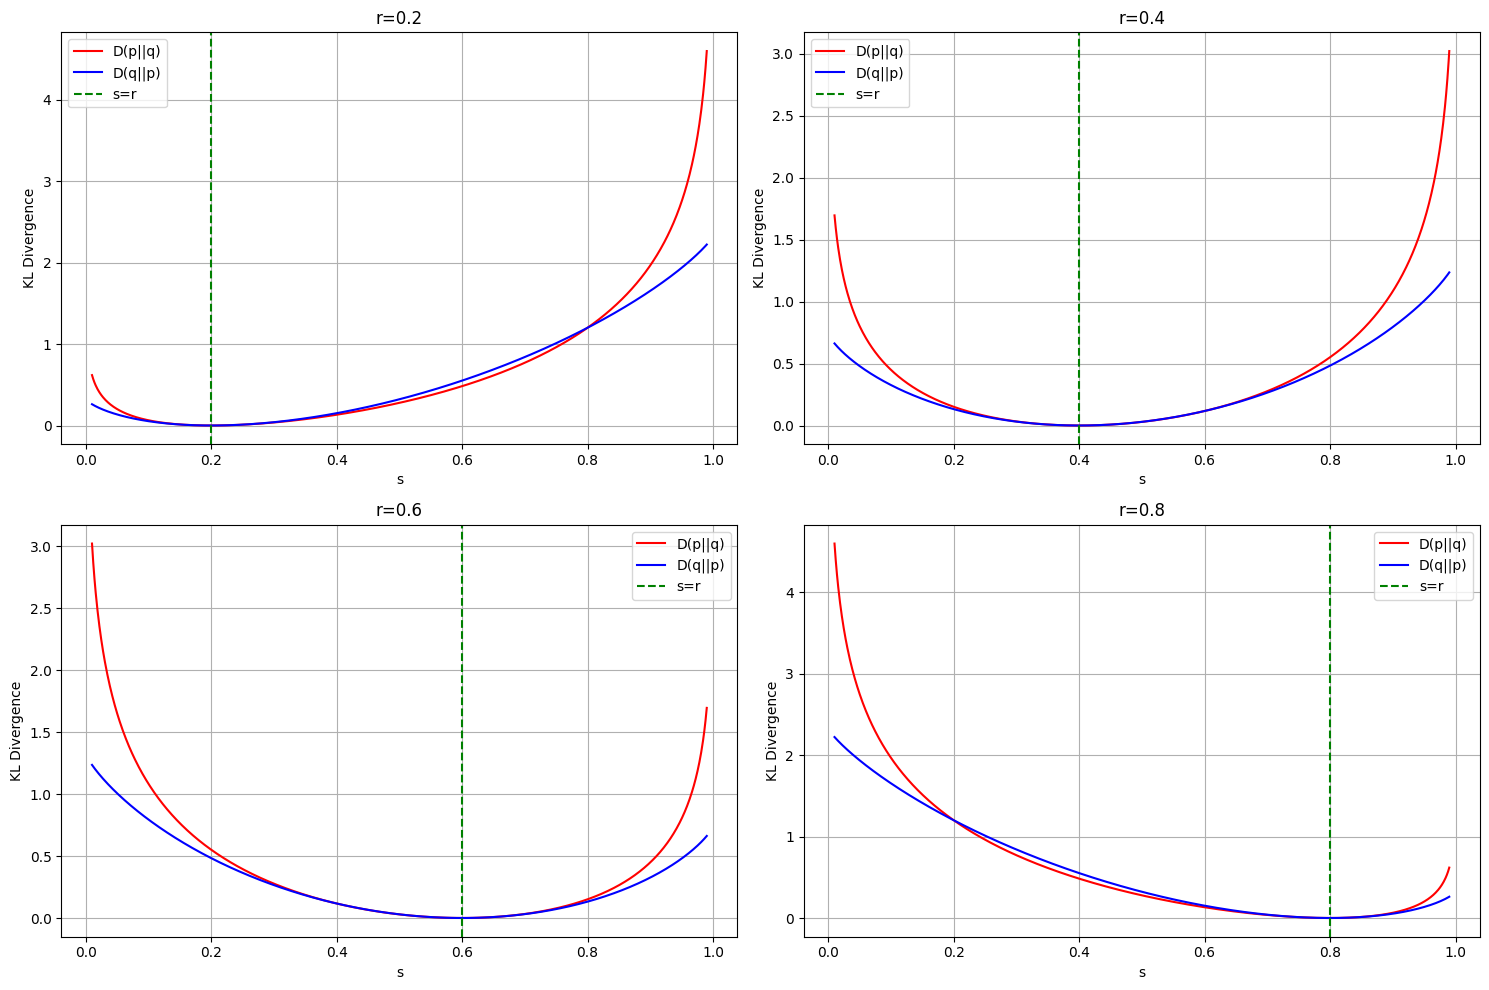

In [11]:
## Que 10 (b) (i)
# p ~ Bern(r), q ~ Bern(s)

# plot D(p||q) & D(q||p) as a function of r and s
# fix r, vary s
r = 0.5
s = np.linspace(0.01, 0.99, 1000)
p = [r, 1-r]
Dpq = np.array([KL_divergence(p, [i, 1-i]) for i in s])
Dqp = np.array([KL_divergence([i, 1-i], p) for i in s])

plt.figure(figsize=(10, 5))
plt.plot(s, Dpq, color='r', label='D(p||q)')
plt.plot(s, Dqp, color='b', label='D(q||p)')
plt.xlabel("s")
plt.ylabel("KL Divergence")
plt.title("KL Divergence of Bernoulli(r) and Bernoulli(s), for r=0.5")
plt.axvline(x=r, linestyle='--', color='g', label='s=r')
plt.legend()
plt.grid()
plt.show()

# make 2x2 grid for r = 0.2, 0.4, 0.6, 0.8
plt.figure(figsize=(15, 10))
for i, r in enumerate([0.2, 0.4, 0.6, 0.8]):
    p = [r, 1-r]
    s = np.linspace(0.01, 0.99, 1000)
    Dpq = np.array([KL_divergence(p, [i, 1-i]) for i in s])
    Dqp = np.array([KL_divergence([i, 1-i], p) for i in s])
    ax = plt.subplot(2, 2, i+1)
    ax.plot(s, Dpq, color='r', label='D(p||q)')
    ax.plot(s, Dqp, color='b', label='D(q||p)')
    # line at s = r
    ax.axvline(x=r, linestyle='--', color='g', label='s=r')
    ax.set_title(f"r={r}")
    ax.set_xlabel("s")
    ax.set_ylabel("KL Divergence")
    ax.legend()
    ax.grid()
plt.tight_layout()
plt.show()


$
\text{ (ii): By plots for various values of r, we can that D(p||q) is non-negative} \\
$

$ 
\text{ (iii): In plot, D(p||q) = D(q||q) at differnt values of s, } \\
\text{ but both D(p||q) and D(q||p) are equal to 0 at r=s.} \\
$

In [12]:
# Que 10 (iv)
# find D(p||q) and D(q||p) where p and q are the normalized histograms of left.png and right.png respectively.
p = get_normalized_histogram(img1)
q = get_normalized_histogram(img2)

print(f"D(left||right) = {KL_divergence(p, q)}")
print(f"D(right||left) = {KL_divergence(q, p)}")


D(left||right) = 0.015104015237387056
D(right||left) = 0.014409785833354479


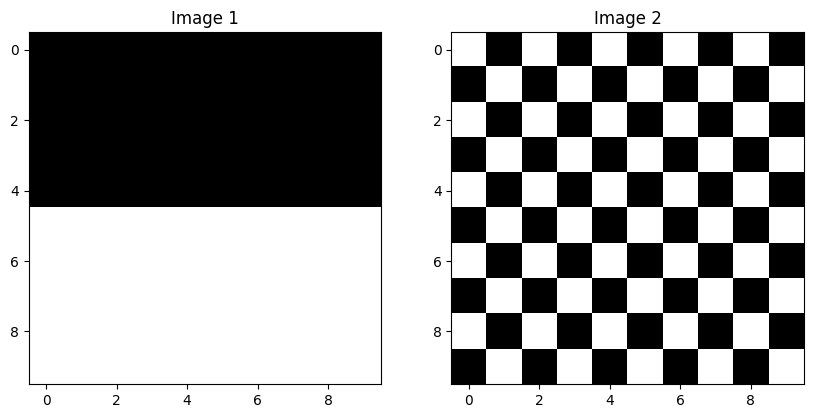

D(img1||img2) = 0.0


In [13]:
# make a 10x10 image with first 10x5 as 0 and next 10x5 as 1
img = np.zeros((10, 10))
img[5:, :] = 1
img = img.astype(int)

# make a 10x10 image with 2x2 blocks of 0 and 1
img2 = np.zeros((10, 10))
img2[::2, ::2] = 1
img2[1::2, 1::2] = 1
img2 = img2.astype(int)

# plot both images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
# plt.axis('off')
plt.title("Image 1")

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
# plt.axis('off')
plt.title("Image 2")
plt.show()

# kl divergence between the two images
p = get_normalized_histogram(img)
q = get_normalized_histogram(img2)

print(f"D(img1||img2) = {KL_divergence(p, q)}")

$
\text{ Que 10 (iv)} \\
\bullet \text{ KL divergence is not a good measure of similarity between two images, as it compares the difference between two probability distributions, so we to convert images to probability distributions.} \\
\bullet \text{Here we find the kl divergence between two images, by computing histograms} \\
\bullet \text{Now, two images can be different but their histograms can be same, and vice versa.} \\
\bullet \text{ For same image, its rotated versions will have same histogram.} \\
\bullet \text{ Take above example, where KL divergence is 0 for a chess board image and half black and half white image, even though images are completely different.} \\
$